In [9]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.file import Subject
from pynwb.epoch import TimeIntervals
from pynwb.image import ImageSeries
from ndx_manoli_meta import AssayMetadata

In [10]:
# ----- Set up to interface with NWB files -----
nwbfile_path = os.path.join('M:\\','scn2a-paper-GWJSNH','NWB-files')
allnwb = []
allnwb += [each for each in os.listdir(nwbfile_path) if each.endswith('_introduction.nwb')]

In [11]:
# ----- Do stuff with the data in the files -----

# What do I actually want to do? Count up time spent huddling?

gts = []
sexes = []
snifftimes = []

for i,fname in enumerate(allnwb):

    # open file
    io = NWBHDF5IO(os.path.join(nwbfile_path,fname), mode="r+") # <-- open in write to append snippets?
    nwbfile = io.read()
    print(fname)
    
    gts.append(nwbfile.subject.genotype)
    sexes.append(nwbfile.subject.sex)
    
    # calculate time spend in huddle
    bdat = nwbfile.intervals['annotated_behavior'].to_dataframe() # send the table to pandas format
    sniff_filt = bdat.behavior=='Sniff'
    durs_sniff = bdat.duration[sniff_filt]
    total_sniff = np.sum(durs_sniff)
    if total_sniff>500:
        print(fname)
    snifftimes.append(total_sniff)    
    
    io.close()

Nov22_Pair15_introduction.nwb
Nov22_Pair16_introduction.nwb
Nov22_Pair17_introduction.nwb
Nov22_Pair18_introduction.nwb
Nov22_Pair19_introduction.nwb
Nov22_Pair1_introduction.nwb
Nov22_Pair21_introduction.nwb
Nov22_Pair22_introduction.nwb
Nov22_Pair23_introduction.nwb
Nov22_Pair24_introduction.nwb
Nov22_Pair25_introduction.nwb
Nov22_Pair26_introduction.nwb
Nov22_Pair27_introduction.nwb
Nov22_Pair28_introduction.nwb
Nov22_Pair29_introduction.nwb
Nov22_Pair2_introduction.nwb
Nov22_Pair30_introduction.nwb
Nov22_Pair31_introduction.nwb
Nov22_Pair32_introduction.nwb
Nov22_Pair33_introduction.nwb
Nov22_Pair34_introduction.nwb
Nov22_Pair35_introduction.nwb
Nov22_Pair36_introduction.nwb
Nov22_Pair37_introduction.nwb
Nov22_Pair38_introduction.nwb
Nov22_Pair39_introduction.nwb
Nov22_Pair3_introduction.nwb
Nov22_Pair40_introduction.nwb
Nov22_Pair41_introduction.nwb
Nov22_Pair42_introduction.nwb
Nov22_Pair43_introduction.nwb
Nov22_Pair44_introduction.nwb
Nov22_Pair46_introduction.nwb
Nov22_Pair47_

In [14]:
ctab

,GT,sex,sniff
0,Het,F,39.647
1,WT,F,82.808
2,Het,M,71.778
3,WT,M,31.756
4,WT,M,22.981
5,Het,F,83.403
6,Het,F,111.079
7,Het,F,58.442
8,Het,F,111.559
9,Het,M,27.074


In [17]:
collate = {'GT' : gts, 'sex': sexes, 'total_sniff_time' : snifftimes}
ctab = pd.DataFrame(data=collate)

<AxesSubplot: xlabel='sex', ylabel='total_sniff_time'>

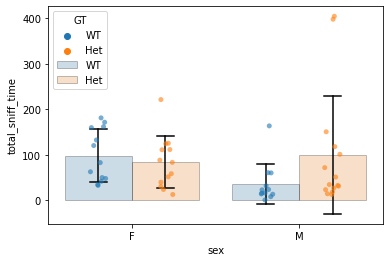

In [19]:
ax = sns.barplot(
    x="sex", 
    y="total_sniff_time", 
    hue="GT", 
    data=ctab, 
    errorbar="sd", 
    edgecolor="black",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.1,
    alpha=0.25,
    hue_order = ['WT','Het']
)

sns.stripplot(
    x="sex", 
    y="total_sniff_time", 
    hue="GT", 
    data=ctab, dodge=True, alpha=0.6, ax=ax,
    hue_order = ['WT','Het']
)

In [26]:
snifftimes

[39.64699999999999,
 122.455,
 71.77799999999999,
 31.756,
 22.981,
 83.40299999999999,
 111.07900000000002,
 58.44199999999999,
 111.55899999999998,
 27.073999999999998,
 51.033,
 398.11400000000003,
 404.68399999999997,
 1423.525,
 12.665,
 47.936,
 78.29100000000001,
 161.81099999999998,
 32.669,
 31.131999999999998,
 150.61299999999997,
 34.480000000000004,
 125.434,
 12.726,
 23.630000000000003,
 13.247,
 23.775000000000002,
 39.433,
 16.039,
 18.499,
 163.584,
 34.51800000000001,
 117.93700000000003,
 7.892,
 23.321,
 60.202000000000005,
 32.697,
 47.032000000000004,
 0.741,
 101.09900000000003,
 181.209,
 60.592,
 13.911000000000003,
 159.762,
 221.43199999999996,
 393.016,
 132.49900000000002,
 41.784000000000006,
 62.635,
 49.928999999999995,
 124.29899999999999,
 88.231,
 120.331]

In [32]:
# figure out what's up with pair 28

fname = 'Nov22_Pair28_introduction.nwb'
io = NWBHDF5IO(os.path.join(nwbfile_path,fname), mode="r+") # <-- open in write to append snippets?
nwbfile = io.read()

# calculate time spend in huddle
bdat = nwbfile.intervals['annotated_behavior'].to_dataframe() # send the table to pandas format

In [40]:
timefilt = bdat.stop_time<bdat.start_time[0]+1800
sniff_filt = bdat.behavior=='Sniff'
durs_sniff = bdat.duration[sniff_filt&timefilt]
print(len(durs_sniff))
print(np.max(durs_sniff))
total_sniff = np.sum(durs_sniff)
print(total_sniff)
print(np.sum(bdat.duration[timefilt]))

1004
17.002
1409.574
20816.068


In [41]:
io.close()

In [16]:
grpdat = []
for sex in np.unique(sexes):
    for gt in np.unique(gts):
        mask = np.logical_and(np.array(sexes)==sex, np.array(gts)==gt)
        grpdat.append(np.array(snifftimes)[mask])